# Visualización

Python proporciona diverso métodos para la visualización de datos. 

[Pandas](https://pandas.pydata.org) es una biblioteca de Python con características de marco de datos que proporciona opciones integradas para trazar visualizaciones en un estilo tabular bidimensional.

Otras bibliotecas de Python para la visualización de datos son:
- [Seaborn](https://seaborn.pydata.org), es ideal para crear gráficos estadísticos visualmente atractivos que incluyen color.
- [Bokeh](https://bokeh.org), opera bien para visualizaciones complejas, especialmente para presentaciones interactivas basadas en la web
- [Pygal](http://www.pygal.org/en/stable/), opera bien para generar archivos vectoriales e interactivos.
- [Plotly](https://pypi.org/project/plotly/), es la opción más útil y sencilla para crear visualizaciones basadas en web altamente interactivas.

La gráfica presenta una sugerencia del uso de gráficos para la presentación de datos.

![char-chooser](https://extremepresentation.typepad.com/.a/6a00d8341bfd2e53ef00e553577fea8833-pi)

In [2]:
import pandas as pd

salarios = pd.read_csv ('dataset/salarios.csv')
salarios.head()

,jerarquia,disciplina,phd_experiencia,servicio_anios,genero,salario
0,Prof,B,56,49,Male,1869600
1,Prof,A,12,6,Male,930000
2,Prof,A,23,20,Male,1105150
3,Prof,A,40,31,Male,1312050
4,Prof,B,20,18,Male,1048000


## Gráfico de linea

La función `plot()` presenta los datos del dataframe por medio de un gráfico de líneas. Por defecto, gráfica todas aquellas variables numéricas.

<AxesSubplot:>

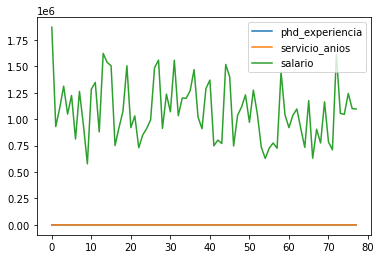

In [4]:
salarios.plot()

Representando las variables que presentan valores numéricos más cercanos, la siguiente gráfica muestra una correlación entre doctorado y servicios a lo largo de los años, excepto desde los 55 hasta los 80 años, donde los servicios disminuyen, lo que significa que algunas personas dejaron el servicio a los 55 años o más.

<AxesSubplot:>

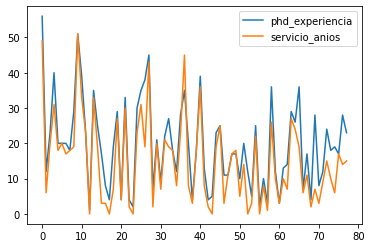

In [5]:
salarios[['phd_experiencia','servicio_anios']].plot()

# Gráficos de barras

- Se utilizan para comparar diferentes grupos o realizar un seguimiento de los cambios a lo largo del tiempo.

Agrupando los datos, esto es, agregando los salarios por categorías de servicio y ordenándolos de forma descendente de acuerdo al salario,

In [6]:
salarios_by_servicio = salarios.groupby(['servicio_anios']).sum()
salarios_by_servicio.sort_values('salario', ascending=False, inplace=True)
salarios_by_servicio.head()

,phd_experiencia,salario
servicio_anios,,
19,178,7694480
3,56,6352160
18,91,6030600
0,26,5195000
7,70,4404080


la grafica muestra que la mayoría de las personas prestan servicios aproximadamente 19 años, por lo que el salario acumulado más alto corresponde a esta categoría.

__NOTA__: El parámetro `inplace=True` genera que la función `sort_values()` retorne `None` y modifica el dataframe original.

<AxesSubplot:title={'center':'Salario acumulado por años de servicios'}, xlabel='servicio_anios'>

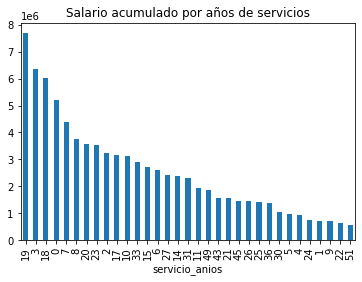

In [7]:
salarios_by_servicio['salario'].plot.bar(
    title='Salario acumulado por años de servicios'
    )

La función `head()` permite mostrar un subconjunto de valores:

<AxesSubplot:title={'center':'Ph.D. VS Años de servicio'}>

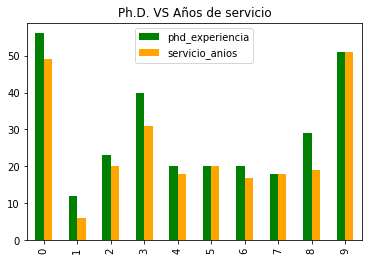

In [8]:
salarios[['phd_experiencia', 'servicio_anios']].head(10).plot.bar(
    title = 'Ph.D. VS Años de servicio',
    color = ['green', 'orange']
)

## Gráfico circular

- Son útiles para comparar pocas variables.
- Son útiles para comparar partes de un todo.
- No muestran cambios a lo largo del tiempo.

Comparando un paquete de salarios de 5 profesionales:


<AxesSubplot:ylabel='salario'>

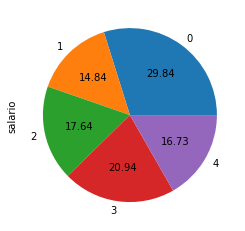

In [9]:
salarios['salario'].head(5).plot.pie(
    autopct = '%.2f'
)

## Diagrama de caja (_box plot_)

Representar gráficamente una serie de datos numéricos a tráves de sus cuartiles. Permite mostrar,
- Rango
- Valores atípicos (_outliers_)
- Mediana
- Cuartiles
- IQR
- Mínimo y máximo

<img src="https://upload.wikimedia.org/wikipedia/commons/4/4a/Diagrama_de_caja.jpg" alt="Descripción blox plot" width="550" title="Cortesia de wikipedia.org">

- Se usa para comparar variables usando valores estadísticos.
- Las variables comparables deben tener las misma unidades.

Comparando los años de Ph.D. y el salario, el gráfico de caja produce cifras incorrectas y no proporciona información de comparación real. Esto, debido a que las unidades numéricas del salario son magnitudes mayores que las de Ph.D.,

<AxesSubplot:>

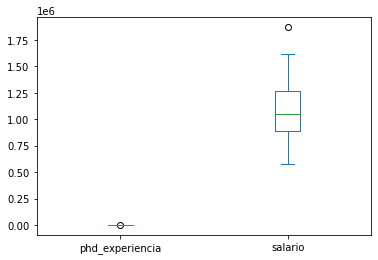

In [10]:
salarios[['phd_experiencia', 'salario']].plot.box()

La gráfica Ph.D. y años de servicio muestra que la mediana y los cuartiles de Ph.D. son más altos que la mediana y los cuartiles de años de servicio. Además, el rango de Ph.D. es más amplio que el rango de años de servicio.

<AxesSubplot:>

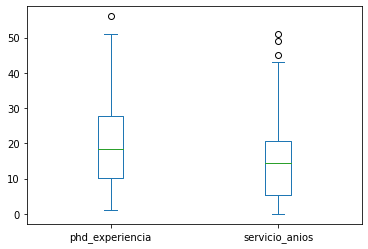

In [11]:
salarios[['phd_experiencia', 'servicio_anios']].plot.box()

Utilizando la librería [Seaborn](https://seaborn.pydata.org), el diagrama de cajas para la variable jerarquía, incoporando el genero de cada profesional,

<AxesSubplot:xlabel='jerarquia', ylabel='salario'>

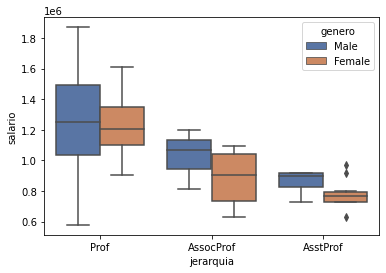

In [13]:
import seaborn as sns

sns.boxplot(
    data = salarios,
    x = 'jerarquia', 
    y = 'salario', 
    hue='genero',       # (tono) se usa para definir el atributo de la leyenda
    palette='deep'      # paleta de colores 
    )

[Paletas de colores](https://seaborn.pydata.org/tutorial/color_palettes.html)

## Histograma

- Los histogramas se usan para representar la distribucion de una variable, esto es, que rango de valores tiene y cuales son los valores más comunes.

Los 15 primeros valores de la variable salarios, muestra que los salarios más frecuentes se encuentran en torno a 1.3 millones.

<AxesSubplot:>

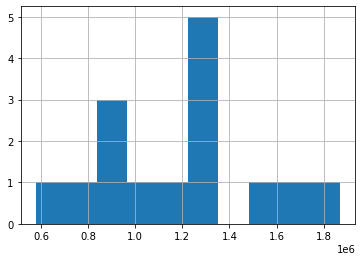

In [14]:
salarios['salario'].head(15).hist()

## Diagrama de dispersión

- Un diagrama de dispersión muestra la relación entre dos variables.
- Se utiliza una línea de tendencia para determinar correlación positiva, negativa o nula.

<AxesSubplot:title={'center':'Ph.D. VS Años de servicio'}, xlabel='phd_experiencia', ylabel='servicio_anios'>

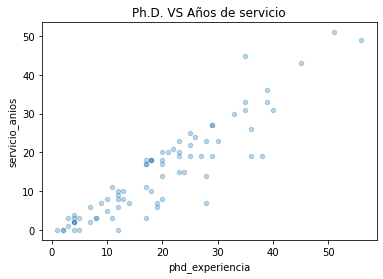

In [15]:
salarios.plot.scatter(
    x = 'phd_experiencia',
    y = 'servicio_anios',
    title = 'Ph.D. VS Años de servicio',
    alpha = 0.3
    )

## Strip plot

- Es un diagrama de dispersión donde una de las variables es categórica.

<AxesSubplot:xlabel='salario'>

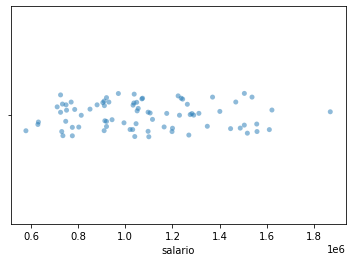

In [16]:
# Librería Seaborn
sns.stripplot(
    x = salarios['salario'],
    jitter = True, # permite controlar el ancho de las barras (separación aleatorio)
    alpha = .5
    )

<AxesSubplot:xlabel='genero', ylabel='salario'>

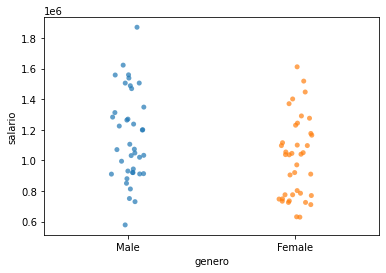

In [20]:
# Librería Seaborn
sns.stripplot(
    data =  salarios,
    x = salarios['genero'],
    y = salarios['salario'],
    jitter = True,      # distribucion
    alpha = .7
)

<AxesSubplot:xlabel='jerarquia', ylabel='salario'>

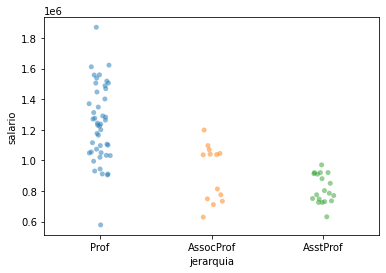

In [24]:
# Librería Seaborn
sns.stripplot(
    data =  salarios,
    x = salarios['jerarquia'],
    y = salarios['salario'],
    alpha = .5      # transparencia
)

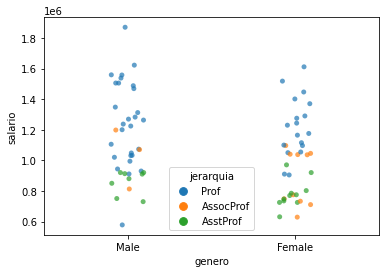

In [135]:
# Librería Seaborn
sns.stripplot(
    data =  salarios,
    x = salarios['genero'],
    y = salarios['salario'],
    hue = salarios['jerarquia'],   # tinte por categoria 
    alpha = .7
)

## Swarm plot

- Se utiliza para visualizar diferentes categorías.
- Proporciona la distribución de una variable vs otras variables.





<AxesSubplot:xlabel='genero', ylabel='salario'>

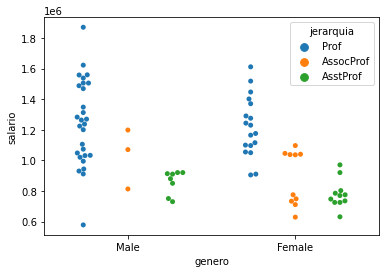

In [25]:
# Librería Seaborn
sns.swarmplot( 
    data = salarios,
    x = 'genero', 
    y = 'salario', 
    hue = 'jerarquia',
    palette = "tab10", 
    dodge = True    # if False permite sobreponer los valores
    )

La distribución salarial por genero, refleja que,

- Los hombres tienen el rango salarial mas alto.
- Las mayoría de los hombres son titulares (Prof), seguido de asistentes y luego asociados.
- La mayoria de los profesores son hombres, pero la mayoría de los profesores asociados son mujeres.

## Joint plot

- Permite combinar diagramas.
- Es útil para visualizar patrones seleccionados.

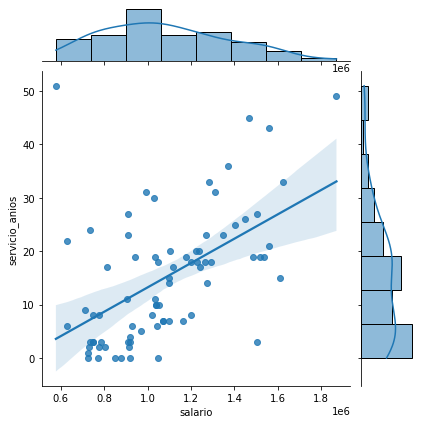

In [26]:
# Librería Seaborn
sns.jointplot(
    data = salarios,
    x = 'salario', 
    y = 'servicio_anios', 
    kind = 'reg'
    )

## Actividad

Elegir una librería alternativas a las usadas en la clase y abordar los siguientes aspectos:
1. Descripción
2. Instlación
3. Enlace a la documentación oficial (uso y tutorial)
4. Presentar ejemplos utilizando los datos de la clase
